# Workbook for plotting and labelling an XRD pattern

## Import stuff

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.xrd_tools import getReflections

## Settings

In [17]:
filename = 'data/test.xy'

wavelength = 1.5406                                         # Wavelength in angstrom

# Get reflections for Zr, delta hydride and SPP
zr_peak_name, zr_peak_pos = getReflections(crystalType='hcp', a=3.232, c=5.147, wavelength=wavelength, printReflections=False)
delta_peak_name, delta_peak_pos = getReflections(crystalType='fcc', a=4.777, wavelength=wavelength, printReflections=False)
spp_peak_name, spp_peak_pos = getReflections(crystalType='hcp', a=5.028, c=8.248, wavelength=wavelength, printReflections=False)

## Run

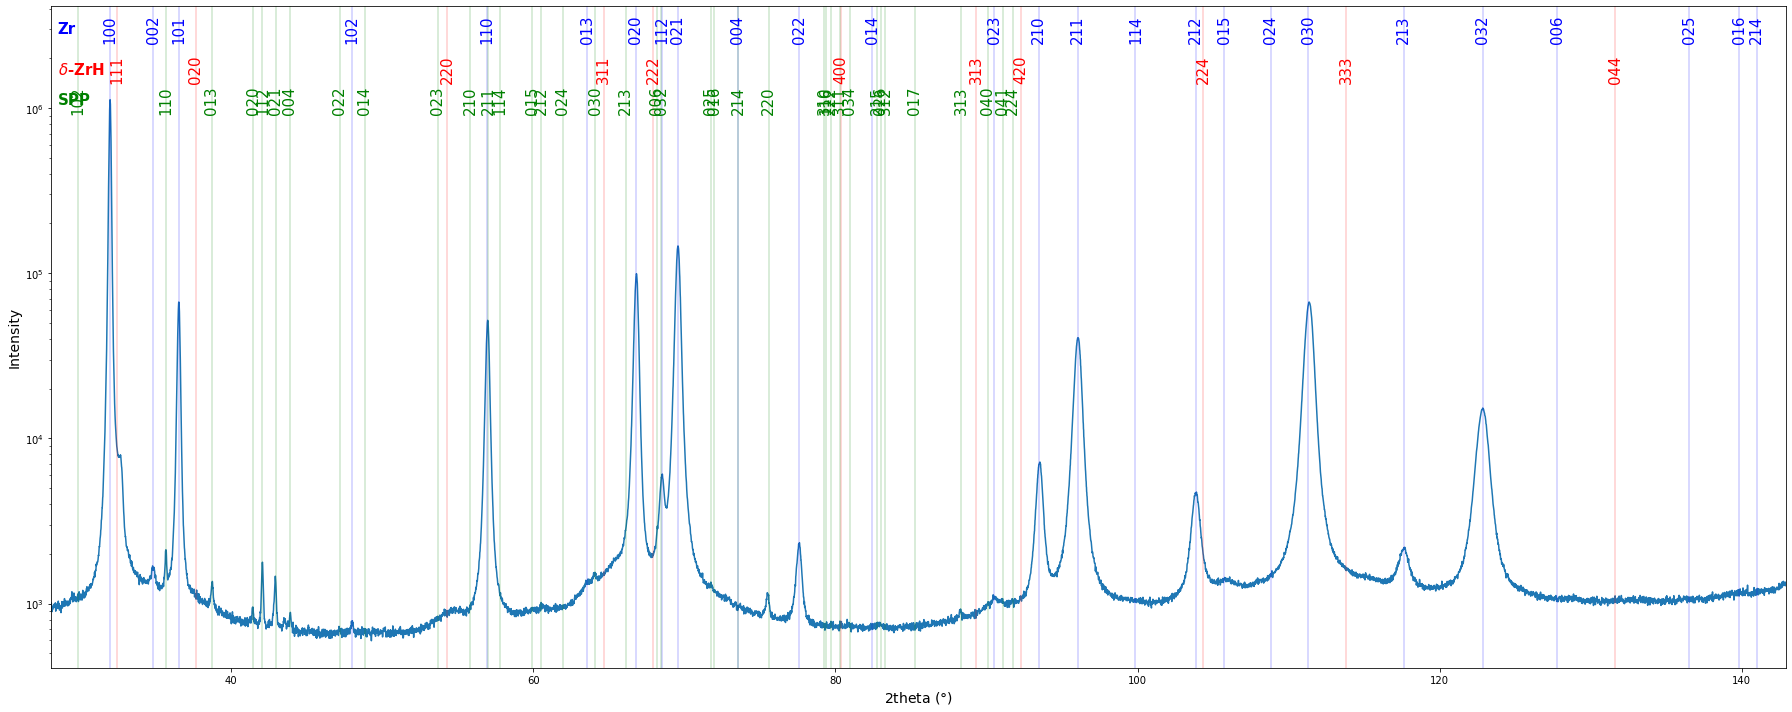

In [46]:
data = np.loadtxt(filename)
x = data[:,0]
y = data[:,1]

maxval = np.max(y)+3000000

fig, ax = plt.subplots(figsize=(25,10))

ax.plot(x, y)
plt.xlim(np.min(x), np.max(x))
plt.yscale('log')
plt.xlabel('2theta ($\degree$)', fontsize=14)
plt.ylabel('Intensity', fontsize=14)
plt.ylim(top=maxval)

ax.text(x=28.5, y=maxval - 1100000, s='Zr', fontsize=15, c='b', fontweight='bold', va= 'center')
for idx, angle in zip(zr_peak_name, zr_peak_pos):
    if np.min(x) < angle < np.max(x):
        ax.axvline(angle, alpha=0.2, c='b')
        ax.text(x=angle, y=maxval - 1100000,  s=idx, fontsize=15, c='b', rotation=90, ha= 'center', va= 'center')

ax.text(x=28.5, y=maxval - 2400000, s='$\delta$-ZrH', fontsize=15, c='r', fontweight='bold', va= 'center')
for idx, angle in zip(delta_peak_name, delta_peak_pos):
    if np.min(x) < angle < np.max(x):
        ax.axvline(angle, alpha=0.2, c='r')
        ax.text(x=angle, y=maxval - 2400000, s=idx, fontsize=15, c='r', rotation=90, ha= 'center', va= 'center')

ax.text(x=28.5, y=maxval - 3000000, s='SPP', fontsize=15, c='g', fontweight='bold', va= 'center')
for idx, angle in zip(spp_peak_name, spp_peak_pos):
    if np.min(x) < angle < np.max(x):
        ax.axvline(angle, alpha=0.2, c='g')
        ax.text(x=angle, y=maxval - 3000000, s=idx, fontsize=15, c='g', rotation=90, ha= 'center', va= 'center')

    
plt.tight_layout()